Copyright (c) 2017 [Geosoft Inc.](geosoft.com)

https://github.com/GeosoftInc/gxpy

[BSD 2-clause License](https://github.com/GeosoftInc/gxpy/blob/master/LICENSE)

# 3D Views - Planes and Relief Surfaces

3D Views contain 3D models that represent surface and sub-surface objects as 3-dimensional shapes and features.  3D views are stored in a file with extension `.geosoft_3dv` and can be viewed in Geosoft's 3D viewer.

A 3D view also has one or more "drawing planes" on which 2D objects will be drawn.  A 3D view will always have at least one drawing plane that by default is a horizontal surface at elevation=0. Additional drawing planes can be added for various purposes, such as creating stacked 3D planes. Drawing planes can also be turned into a function surface, the shape of which is determined from a data grid.  For example, defining the shape of a drawing plane from a DEM surface results in the plane becoming a true 3D DEM surface.

### Lessons

<!--- # Run this from a code cell to create TOC markdown: -->
<!--- import geosoft.gxpy.utility; print(geosoft.gxpy.utility.jupyter_markdown_toc('3D Views - Planes and Relief Surfaces')) -->
 1. [Imports,  GX context and get data from GitHub](#Imports,--GX-context-and-get-data-from-GitHub)
 2. [Draw to a Flat Plane in 3D](#Draw-to-a-Flat-Plane-in-3D)
 3. [Draw on a 3D Relief Surface](#Draw-on-a-3D-Relief-Surface)
 4. [Display Data on the Digital Elevation Model](#Display-Data-on-the-Digital-Elevation-Model)
 5. [Stacked Planes](#Stacked-Planes)
 6. [Display in the Geosoft 3D Viewer](#Display-in-the-Geosoft-3D-Viewer)

__See also:__ [Tutorial page](https://geosoftgxdev.atlassian.net/wiki/spaces/GXD93/pages/111542335/3D+Views+-+Planes+and+Relief+Surfaces)

> Some map features in this notebook require a Geosoft End-User License.

## Imports,  GX context and get data from GitHub

In [1]:
import geosoft.gxpy.gx as gx
import geosoft.gxpy.view as gxview
import geosoft.gxpy.group as gxgroup
import geosoft.gxpy.agg as gxagg
import geosoft.gxpy.grid as gxgrd
import geosoft.gxpy.viewer as gxviewer
import geosoft.gxpy.utility as gxu
import geosoft.gxpy.map as gxmap
from IPython.display import Image

gxc = gx.GXpy()

url = 'https://github.com/GeosoftInc/gxpy/raw/9.3/examples/tutorial/3D%20Views/'
gxu.url_retrieve(url + 'Wittichica Creek Residual Total Field.grd')
gxu.url_retrieve(url + 'Wittichica Creek Residual Total Field.grd.gi')
gxu.url_retrieve(url + 'Wittichica Creek Residual Total Field.grd.xml')
gxu.url_retrieve(url + 'Wittichica DEM.grd')
gxu.url_retrieve(url + 'Wittichica DEM.grd.gi')
gxu.url_retrieve(url + 'Wittichica DEM.grd.xml')

tmi_file = 'Wittichica Creek Residual Total Field.grd'
dem_file = 'Wittichica DEM.grd'

## Draw to a Flat Plane in 3D

In this first example we will simply draw to the default drawing plane on a new 3D view.

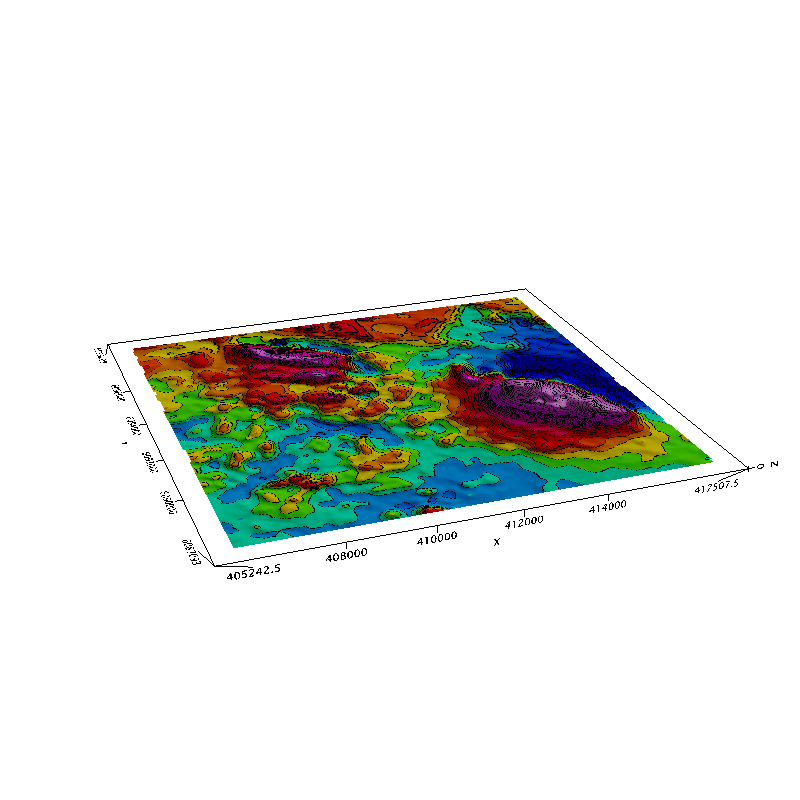

In [2]:
# create a 3D view
with gxview.View_3d.new("TMI on a plane",
                        area_2d=gxgrd.Grid(tmi_file).extent_2d(),
                        coordinate_system=gxgrd.Grid(tmi_file).coordinate_system,
                        overwrite=True) as v:
 
    v3d_name = v.file_name
 
    # add the grid image to the view, with shading, ands contour
    gxgroup.Aggregate_group.new(v, gxagg.Aggregate_image.new(tmi_file, shade=True, contour=20))
    gxgroup.contour(v, 'TMI_contour', tmi_file)

# display
Image(gxmap.Map.open(v3d_name).image_file(pix_width=800))

## Draw on a 3D Relief Surface

In this example we use the data values to define a 3D relief surface for the drawing plane, which transforms from a flat plane to a function surface with function relief defined by the grid data values.

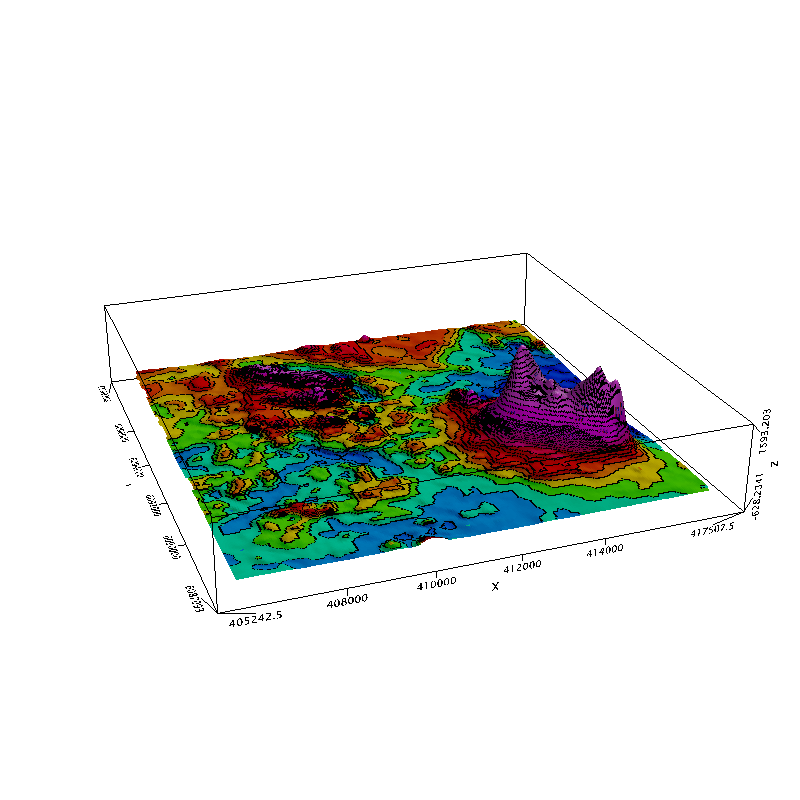

In [3]:
# create a 3D view
with gxview.View_3d.new("TMI in relief",
                        area_2d=gxgrd.Grid.open(tmi_file).extent_2d(),
                        coordinate_system=gxgrd.Grid.open(tmi_file).coordinate_system,
                        overwrite=True) as v:
 
    v3d_name = v.file_name
 
    # use the data grid as the relief surface
    v.set_plane_relief_surface(tmi_file)
 
    # add the grid image to the view, with shading, 20 nT contour interval to match default contour lines
    gxgroup.Aggregate_group.new(v, gxagg.Aggregate_image.new(tmi_file, shade=True, contour=20))
    gxgroup.contour(v, 'TMI_contour', tmi_file)
    
# create a PNG and display
Image(gxmap.Map.open(v3d_name).image_file(pix_width=800))

## Display Data on the Digital Elevation Model

Instead of using the TMI grid to define the relief surface, this time we will use the DEM grid.

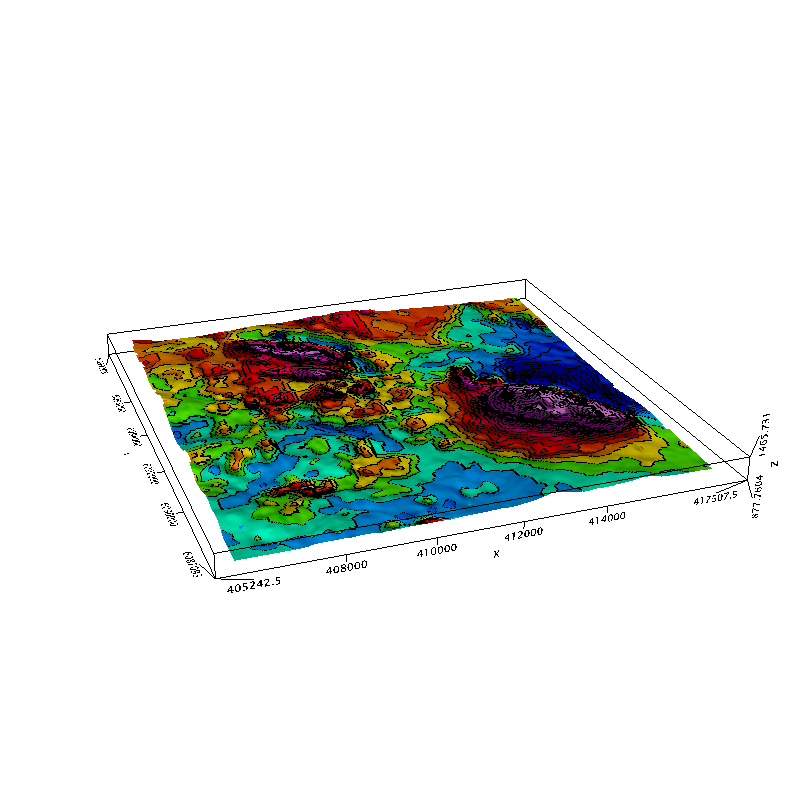

In [4]:
# create a 3D view
with gxview.View_3d.new("TMI in relief",
                        area_2d=gxgrd.Grid.open(tmi_file).extent_2d(),
                        coordinate_system=gxgrd.Grid.open(tmi_file).coordinate_system,
                        overwrite=True) as v:
 
    v3d_name = v.file_name
 
    # use the data grid as the relief surface
    v.set_plane_relief_surface(dem_file)
 
    # add the grid image to the view, with shading, 20 nT contour interval to match default contour lines
    gxgroup.Aggregate_group.new(v, gxagg.Aggregate_image.new(tmi_file, shade=True, contour=20))
    gxgroup.contour(v, 'TMI_contour', tmi_file)
    
# create a PNG and display
Image(gxmap.Map.open(v3d_name).image_file(pix_width=800))

## Stacked Planes

A common presentation shows different data layers appearing to float relative to each other.  Here we create two floating planes shown relative to the DEM, which is shown as a relief surface at the expected Z elevation.  The TMI data is shown as a relief surface floating above the DEM with relief determined by the TMI values, and a contour of the DEM data on a flat plane beneath the DEM surface.

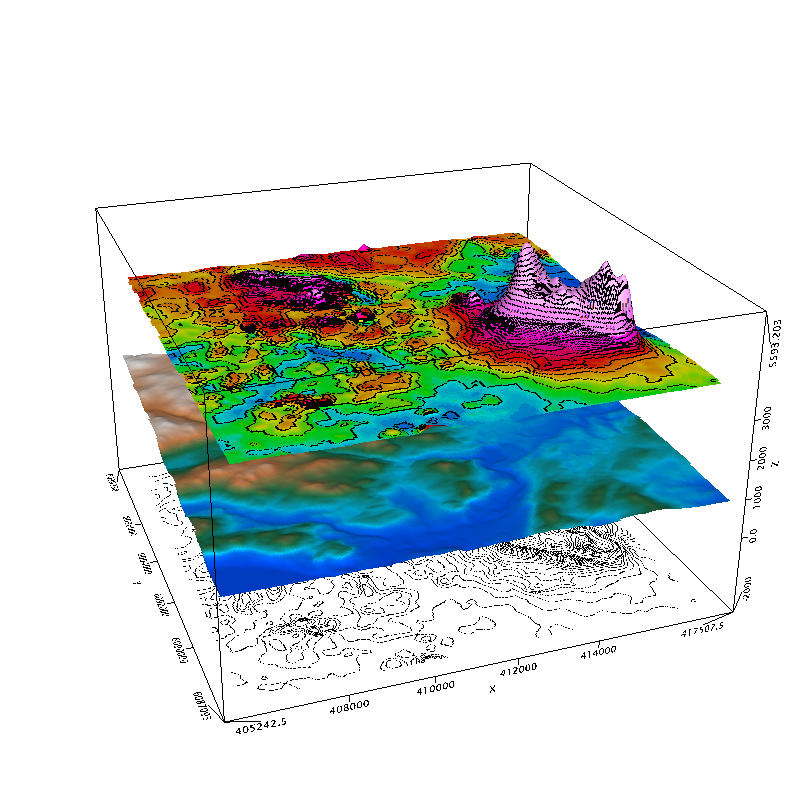

In [5]:
# create a 3D view
with gxview.View_3d.new("Stacked planes",
                        area_2d=gxgrd.Grid.open(tmi_file).extent_2d(),
                        coordinate_system=gxgrd.Grid.open(tmi_file).coordinate_system,
                        overwrite=True) as v:
 
    v3d_name = v.file_name
 
    # use the data grid as the relief surface
    v.set_plane_relief_surface(dem_file)
    gxgroup.Aggregate_group.new(v, gxagg.Aggregate_image.new(dem_file,
                                                             color_map='elevation.tbl'))

    # relief plane for the TMI, offset to elevation 2000
    v.new_drawing_plane('TMI relief')
    v.set_plane_relief_surface(tmi_file, base=-4000)
    gxgroup.Aggregate_group.new(v, gxagg.Aggregate_image.new(tmi_file))
    gxgroup.contour(v, 'TMI_contour', tmi_file)
 
    # add DEM contours on a plane floating beneath the DEM
    v.new_drawing_plane('Scratch plane', offset=(0, 0, -2000))
    gxgroup.contour(v, 'DEM contour', tmi_file)
    
# create a PNG and display
Image(gxmap.Map.open(v3d_name).image_file(pix_width=800))

## Display in the Geosoft 3D Viewer

Finally we will open the stacked view in the Geosoft 3D Viewer.  

In [6]:
gxviewer.view_document(v3d_name, wait_for_close=False)